<a href="https://colab.research.google.com/github/linyuehzzz/census_privacy/blob/main/cell_uniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


####**Read data**
Here we consider different combinations of attributes as the quasi-identifiers:

*   All attributes
*   Voting age * race
*   Race (compared with NHGIS)




Franklin county

In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
from lib.uniques import *

filename_hist1 = 'data/franklin/microdata/franklin_hist.csv'
hist1 = pd.read_csv(filename_hist1)
filename_hist2 = 'data/franklin/microdata/rho_1.60/franklin_hist_dp_blk2.csv'
hist2 = pd.read_csv(filename_hist2)

n2, n3, n4 = 2, 2, 63

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE (2016 cells)
hist1_detail = query_detail_ori(hist1)
hist2_detail = query_detail_dp(hist2)

## QID 2: VA * RACE (126 cells)
hist1_va_race = query_race_va_ori(n2, n4, hist1)
hist2_va_race = query_race_va_dp(n2, n4, hist2)

## QID 3: Race* (7 cells)
hist1_race = query_race_ori(n4, hist1)
hist2_race = query_race_dp(n4, hist2)
hist1_detail.size, hist1_va_race.size, hist1_race.size

/content/gdrive/My Drive/Colab Notebooks/census_privacy


(46017216, 2876076, 159782)

Guernsey county

In [3]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
from lib.uniques import *

filename_hist1_g = 'data/guernsey/microdata/guernsey_hist.csv'
hist1_g = pd.read_csv(filename_hist1_g)
filename_hist2_g = 'data/guernsey/microdata/rho_100/guernsey_hist_dp_blk2.csv'
hist2_g = pd.read_csv(filename_hist2_g)

n2, n4 = 2, 63

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
hist1_detail_g = query_detail_ori(hist1_g)
hist2_detail_g = query_detail_dp(hist2_g)

## QID 2: VA * RACE (126 cells)
hist1_va_race_g = query_race_va_ori(n2, n4, hist1_g)
hist2_va_race_g = query_race_va_dp(n2, n4, hist2_g)

## QID 3: Race (7 cells)
hist1_race_g = query_race_ori(n4, hist1_g)
hist2_race_g = query_race_dp(n4, hist2_g)

/content/gdrive/My Drive/Colab Notebooks/census_privacy


####**Data distribution**

In [4]:
def blk_to_bg(hist1):
	col_names = hist1.columns.to_numpy()
	hist1_bg = hist1.groupby(hist1.index.astype(str).str[:12]).sum()
	hist1_bg.index.name = 'BG'
	return hist1_bg

def blk_to_tr(hist1):
	col_names = hist1.columns.to_numpy()
	hist1_tr = hist1.groupby(hist1.index.astype(str).str[:11]).sum()
	hist1_tr.index.name = 'TRACT'
	return hist1_tr

Franklin

In [16]:
unique_detail = (hist1_detail == 1).sum(axis=1)
unique_va_race = (hist1_va_race == 1).sum(axis=1)
unique_race = (hist1_race == 1).sum(axis=1)
print((unique_detail != 0).sum(), (unique_va_race != 0).sum(), (unique_race != 0).sum())

hist1_detail_bg, hist1_va_race_bg, hist1_race_bg = blk_to_bg(hist1_detail), blk_to_bg(hist1_va_race), blk_to_bg(hist1_race)
unique_detail_bg = (hist1_detail_bg == 1).sum(axis=1)
unique_va_race_bg = (hist1_va_race_bg == 1).sum(axis=1)
unique_race_bg = (hist1_race_bg == 1).sum(axis=1)
print((unique_detail_bg != 0).sum(), (unique_va_race_bg != 0).sum(), (unique_race_bg != 0).sum())

hist1_detail_tr, hist1_va_race_tr, hist1_race_tr = blk_to_tr(hist1_detail), blk_to_tr(hist1_va_race), blk_to_tr(hist1_race)
unique_detail_tr = (hist1_detail_tr == 1).sum(axis=1)
unique_va_race_tr = (hist1_va_race_tr == 1).sum(axis=1)
unique_race_tr = (hist1_race_tr == 1).sum(axis=1)
print((unique_detail_tr != 0).sum(), (unique_va_race_tr != 0).sum(), (unique_race_tr != 0).sum())

9291 8332 5562
871 829 350
282 275 80


In [ ]:
# block
print(hist1_detail[hist1_detail>0].stack().value_counts(normalize=True)[1.0], 
      hist1_va_race[hist1_va_race>0].stack().value_counts(normalize=True)[1.0], 
      hist1_race[hist1_race>0].stack().value_counts(normalize=True)[1.0])

# block group
hist1_detail_bg, hist1_va_race_bg, hist1_race_bg = blk_to_bg(hist1_detail), blk_to_bg(hist1_va_race), blk_to_bg(hist1_race)
print(hist1_detail_bg[hist1_detail_bg>0].stack().value_counts(normalize=True)[1.0], 
      hist1_va_race_bg[hist1_va_race_bg>0].stack().value_counts(normalize=True)[1.0], 
      hist1_race_bg[hist1_race_bg>0].stack().value_counts(normalize=True)[1.0])

# tract
hist1_detail_tr, hist1_va_race_tr, hist1_race_tr = blk_to_tr(hist1_detail), blk_to_tr(hist1_va_race), blk_to_tr(hist1_race)
print(hist1_detail_tr[hist1_detail_tr>0].stack().value_counts(normalize=True)[1.0], 
      hist1_va_race_tr[hist1_va_race_tr>0].stack().value_counts(normalize=True)[1.0], 
      hist1_race_tr[hist1_race_tr>0].stack().value_counts(normalize=True)[1.0])

0.2272588480222068 0.2021138312029959 0.17601635248694072
0.23950019625801386 0.21571262205500313 0.07847235417062512
0.220159869936323 0.2069790628115653 0.04479222881813276


Guernsey

In [ ]:
# block
print(hist1_detail_g[hist1_detail_g>0].stack().value_counts(normalize=True)[1.0], 
      hist1_va_race_g[hist1_va_race_g>0].stack().value_counts(normalize=True)[1.0], 
      hist1_race_g[hist1_race_g>0].stack().value_counts(normalize=True)[1.0])

# block group
hist1_detail_bg_g, hist1_va_race_bg_g, hist1_race_bg_g = blk_to_bg(hist1_detail_g), blk_to_bg(hist1_va_race_g), blk_to_bg(hist1_race_g)
print(hist1_detail_bg_g[hist1_detail_bg_g>0].stack().value_counts(normalize=True)[1.0], 
      hist1_va_race_bg_g[hist1_va_race_bg_g>0].stack().value_counts(normalize=True)[1.0], 
      hist1_race_bg_g[hist1_race_bg_g>0].stack().value_counts(normalize=True)[1.0])

# tract
hist1_detail_tr_g, hist1_va_race_tr_g, hist1_race_tr_g = blk_to_tr(hist1_detail_g), blk_to_tr(hist1_va_race_g), blk_to_tr(hist1_race_g)
print(hist1_detail_tr_g[hist1_detail_tr_g>0].stack().value_counts(normalize=True)[1.0], 
      hist1_va_race_tr_g[hist1_va_race_tr_g>0].stack().value_counts(normalize=True)[1.0], 
      hist1_race_tr_g[hist1_race_tr_g>0].stack().value_counts(normalize=True)[1.0])

0.19200538962497193 0.17760259680037097 0.1492204899777283
0.3221476510067114 0.3039772727272727 0.16326530612244897
0.2767857142857143 0.2608695652173913 0.06060606060606061


In [ ]:
hist1_detail_g[hist1_detail_g>0].stack().value_counts(normalize=True), hist1_va_race_g[hist1_va_race_g>0].stack().value_counts(normalize=True), hist1_race_g[hist1_race_g>0].stack().value_counts(normalize=True)

####**Spatial reidentification risks**
> Some simulations to demonstrate how geographic scales affect the probability of finding a true unique. Two aspects of spatial scales are examined here: resolution and extent.

> We test the probability of finding a true unique at block, block group, and tract levels. We make comparisons among (1) our results, (2) NHGIS data from the 2021-06-08 vintage of the PPMF, and (3) the OLS estimators.



Group 1: Franklin County, my data

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
ppv_detail_blk, ppv_detail_bg, ppv_detail_tr, tpr_detail_blk, tpr_detail_bg, tpr_detail_tr = reid_risk(hist1_detail, hist2_detail)

## QID 2: VA * RACE (126 cells)
ppv_va_race_blk, ppv_va_race_bg, ppv_va_race_tr, tpr_va_race_blk, tpr_va_race_bg, tpr_va_race_tr = reid_risk(hist1_va_race, hist2_va_race) 

## QID 3: Race (7 cells)
ppv_race_blk, ppv_race_bg, ppv_race_tr, tpr_race_blk, tpr_race_bg, tpr_race_tr = reid_risk(hist1_race, hist2_race)

print(ppv_detail_blk, ppv_detail_bg, ppv_detail_tr, tpr_detail_blk, tpr_detail_bg, tpr_detail_tr)
print(ppv_va_race_blk, ppv_va_race_bg, ppv_va_race_tr, tpr_va_race_blk, tpr_va_race_bg, tpr_va_race_tr)
print(ppv_race_blk, ppv_race_bg, ppv_race_tr, tpr_race_blk, tpr_race_bg, tpr_race_tr)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
156 16374 3962
119 3661 1010
48 1625 445
161 13061 3239
63 2408 575
31 1038 229
131 6975 2234
16 413 145
6 83 24
0.03937405350832913 0.11782178217821782 0.10786516853932585 0.009527299377061194 0.032504780114722756 0.029538461538461538
0.04970669959864155 0.10956521739130434 0.13537117903930132 0.012326774366434423 0.02616279069767442 0.029865125240847785
0.05863921217547001 0.1103448275862069 0.25 0.01878136200716846 0.0387409200968523 0.07228915662650602


Group 2: Franklin County, OLS

> Let $A_i$ = {cell = $i$ before noise injection}, and the noise be $W\sim N(0,\sigma^2)$. A true unique (TU) is a cell = 1 before and after noise injection. The probability of finding a true unique can be defined using the Bayes' theorem:

> $p(TU)=\frac{p(W=0)p(A_1)}{\sum_ip(W=1-i)p(A_i)}$


> $p(TU)$ is large if (i) the histogram is dominantly "unique", (ii) non-unique cells have relatively large values, and/or (iii) the privacy budget is large.

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.topdown_ols import *
from lib.uniques import *
import math

eps = 17.14
delta = 1e-10
rho = 1.60 * 4099 / 2555 
# rho = cdp2adp.cdp_rho(eps, delta)

## QID 1:  HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
W_detail = workload_mtx_detail()
ppv_detail_ols_blk, ppv_detail_ols_bg, ppv_detail_ols_tr, tpr_detail_ols = reid_risk_ols(rho, hist1_detail, W_detail)

## QID 2: VA * RACE (126 cells)
W_va_race = workload_mtx_va_race()
ppv_va_race_ols_blk, ppv_va_race_ols_bg, ppv_va_race_ols_tr, tpr_va_race_ols = reid_risk_ols(rho, hist1_va_race, W_va_race)

## QID 3: Race (7 cells)
W_race = workload_mtx_race()
ppv_race_ols_blk, ppv_race_ols_bg, ppv_race_ols_tr, tpr_race_ols = reid_risk_ols(rho, hist1_race, W_race)

print(ppv_detail_ols_blk, ppv_detail_ols_bg, ppv_detail_ols_tr, tpr_detail_ols)
print(ppv_va_race_ols_blk, ppv_va_race_ols_bg, ppv_va_race_ols_tr, tpr_va_race_ols)
print(ppv_race_ols_blk, ppv_race_ols_bg, ppv_race_ols_tr, tpr_race_ols)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from scipy.stats import norm
import math
import numpy as np
from lib.topdown_ols import *
from lib.uniques import *

rho = 100 * 4099 / 2555 
f1, f2, f3, f4, f6, f7, f8, f9, f10, f11 = 165/4099*5/4097, 165/4099*9/4097, 165/4099*5/4097, 165/4099*5/4097, 165/4099*5/4097, 165/4099*21/4097, 165/4099*21/4097, 165/4099*5/4097, 165/4099*71/4097, 165/4099*3945/4097
A = strategy_mtx(rho, f1, f2, f3, f4, f6, f7, f8, f9, f10, f11)

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
W_detail = workload_mtx_detail()
var = (W_detail @ np.linalg.inv(A.T @ A) @ W_detail.T)[0, 0]
sigma = math.sqrt(var)
print(norm.cdf(0.5, 0, sigma) - norm.cdf(-0.5, 0, sigma))

## QID 2: VA * RACE (126 cells)
W_va_race = workload_mtx_va_race()
var = (W_va_race @ np.linalg.inv(A.T @ A) @ W_va_race.T)[0, 0]
sigma = math.sqrt(var)
print(norm.cdf(0.5, 0, sigma) - norm.cdf(-0.5, 0, sigma))

## QID 3: Race (7 cells)
W_race = workload_mtx_race()
var = (W_race @ np.linalg.inv(A.T @ A) @ W_race.T)[0, 0]
sigma = math.sqrt(var)
print(norm.cdf(0.5, 0, sigma) - norm.cdf(-0.5, 0, sigma))

/content/gdrive/My Drive/Colab Notebooks/census_privacy
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
0.7935532092818325
0.27947201184512194
0.20598629591771656


Group 3: Guernsey County, my data

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
ppv_detail_blk_g, ppv_detail_bg_g, ppv_detail_tr_g, tpr_detail_blk_g, tpr_detail_bg_g, tpr_detail_tr_g = reid_risk(hist1_detail_g, hist2_detail_g)

## QID 2: VA * RACE (126 cells)
ppv_va_race_blk_g, ppv_va_race_bg_g, ppv_va_race_tr_g, tpr_va_race_blk_g, tpr_va_race_bg_g, tpr_va_race_tr_g = reid_risk(hist1_va_race_g, hist2_va_race_g) 

## QID 3: Race (7 cells)
ppv_race_blk_g, ppv_race_bg_g, ppv_race_tr_g, tpr_race_blk_g, tpr_race_bg_g, tpr_race_tr_g = reid_risk(hist1_race_g, hist2_race_g)

print(ppv_detail_blk_g, ppv_detail_bg_g, ppv_detail_tr_g, tpr_detail_blk_g, tpr_detail_bg_g, tpr_detail_tr_g)
print(ppv_va_race_blk_g, ppv_va_race_bg_g, ppv_va_race_tr_g, tpr_va_race_blk_g, tpr_va_race_bg_g, tpr_va_race_tr_g)
print(ppv_race_blk_g, ppv_race_bg_g, ppv_race_tr_g, tpr_race_blk_g, tpr_race_bg_g, tpr_race_tr_g)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
33 855 1109
43 144 164
14 62 66
35 766 970
35 107 125
6 42 47
16 402 603
18 32 35
0 4 2
0.029756537421100092 0.2621951219512195 0.21212121212121213 0.03859649122807018 0.2986111111111111 0.22580645161290322
0.03608247422680412 0.28 0.1276595744680851 0.04569190600522193 0.32710280373831774 0.14285714285714285
0.026533996683250415 0.5142857142857142 0 0.03980099502487562 0.5625 0


Group 4: Guernsey County, OLS

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.topdown_ols import *
from lib.uniques import *
import math

eps = 17.14
delta = 1e-10
rho = 100 * 4099 / 2555 
# rho = cdp2adp.cdp_rho(eps, delta)

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
W_detail = workload_mtx_detail()
ppv_detail_ols_blk_g, ppv_detail_ols_bg_g, ppv_detail_ols_tr_g, tpr_detail_ols_g = reid_risk_ols(rho, hist1_detail_g, W_detail)

## QID 2: VA * RACE (126 cells)
W_va_race = workload_mtx_va_race()
ppv_va_race_ols_blk_g, ppv_va_race_ols_bg_g, ppv_va_race_ols_tr_g, tpr_va_race_ols_g = reid_risk_ols(rho, hist1_va_race_g, W_va_race)

## QID 3: Race (7 cells)
W_race = workload_mtx_race()
ppv_race_ols_blk_g, ppv_race_ols_bg_g, ppv_race_ols_tr_g, tpr_race_ols_g = reid_risk_ols(rho, hist1_race_g, W_race)

print(ppv_detail_ols_blk_g, ppv_detail_ols_bg_g, ppv_detail_ols_tr_g, tpr_detail_ols_g)
print(ppv_va_race_ols_blk_g, ppv_va_race_ols_bg_g, ppv_va_race_ols_tr_g, tpr_va_race_ols_g)
print(ppv_race_ols_blk_g, ppv_race_ols_bg_g, ppv_race_ols_tr_g, tpr_race_ols_g)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from scipy.stats import norm
import math
import numpy as np
from lib.topdown_ols import *
from lib.uniques import *

rho = 0.01 * 4099 / 2555 
f1, f2, f3, f4, f6, f7, f8, f9, f10, f11 = 165/4099*5/4097, 165/4099*9/4097, 165/4099*5/4097, 165/4099*5/4097, 165/4099*5/4097, 165/4099*21/4097, 165/4099*21/4097, 165/4099*5/4097, 165/4099*71/4097, 165/4099*3945/4097
A = strategy_mtx(rho, f1, f2, f3, f4, f6, f7, f8, f9, f10, f11)

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
W_detail = workload_mtx_detail()
var = (W_detail @ np.linalg.inv(A.T @ A) @ W_detail.T)[0, 0]
sigma = math.sqrt(var)
print(norm.cdf(0.5, 0, sigma) - norm.cdf(-0.5, 0, sigma))

## QID 2: VA * RACE (126 cells)
W_va_race = workload_mtx_va_race()
var = (W_va_race @ np.linalg.inv(A.T @ A) @ W_va_race.T)[0, 0]
sigma = math.sqrt(var)
print(norm.cdf(0.5, 0, sigma) - norm.cdf(-0.5, 0, sigma))

## QID 3: Race (7 cells)
W_race = workload_mtx_race()
var = (W_race @ np.linalg.inv(A.T @ A) @ W_race.T)[0, 0]
sigma = math.sqrt(var)
print(norm.cdf(0.5, 0, sigma) - norm.cdf(-0.5, 0, sigma))

/content/gdrive/My Drive/Colab Notebooks/census_privacy
(1, 2016) (63, 2016) (2, 2016) (2, 2016) (8, 2016) (126, 2016) (126, 2016) (4, 2016) (252, 2016) (2016, 2016) (2600, 2016)
0.010080173769149658
0.002854439303653422
0.002083272308651074


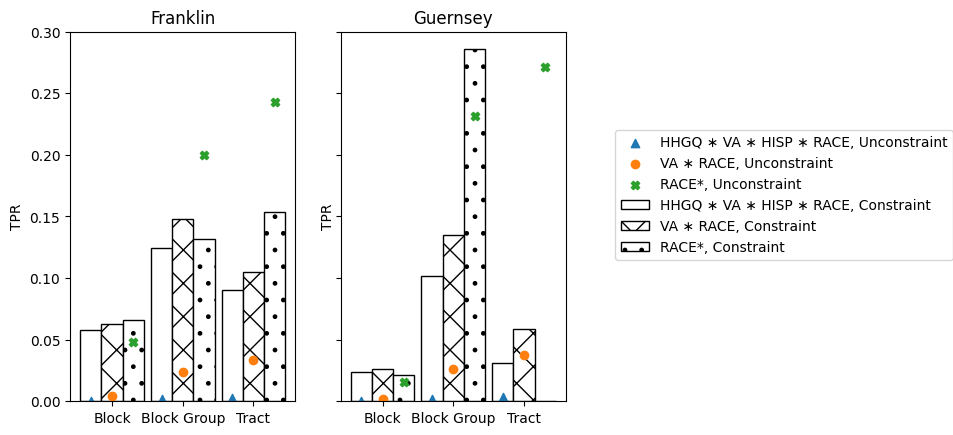

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style

# style.use('seaborn-white')

labels = ['Block', 'Block Group', 'Tract']
x = np.arange(len(labels))  # the label locations
width = 0.3 # the width of the bars
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

## franklin
## Constraint
ppv_1 = [ppv_detail_blk, ppv_detail_bg, ppv_detail_tr]
ppv_2 = [ppv_va_race_blk, ppv_va_race_bg, ppv_va_race_tr]
ppv_3 = [ppv_race_blk, ppv_race_bg, ppv_race_tr]

rects1 = ax[0].bar(x - width, ppv_1, width, label='HHGQ ∗ VA ∗ HISP ∗ RACE, Constraint', color='white', edgecolor='black')
rects2 = ax[0].bar(x, ppv_2, width, label='VA ∗ RACE, Constraint', color='white', edgecolor='black', hatch="x")
rects3 = ax[0].bar(x + width, ppv_3, width, label='RACE*, Constraint', color='white', edgecolor='black', hatch=".")
ax[0].set_title('Franklin')
ax[0].set_ylabel('ppv')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)

## Unconstraint
ppv_1 = [ppv_detail_ols_blk, ppv_detail_ols_bg, ppv_detail_ols_tr]
ppv_2 = [ppv_va_race_ols_blk, ppv_va_race_ols_bg, ppv_va_race_ols_tr]
ppv_3 = [ppv_race_ols_blk, ppv_race_ols_bg, ppv_race_ols_tr]
ax[0].scatter(x - width, ppv_1, marker='^', zorder=2, label='HHGQ ∗ VA ∗ HISP ∗ RACE, Unconstraint')
ax[0].scatter(x, ppv_2, marker='o', zorder=2, label='VA ∗ RACE, Unconstraint')
ax[0].scatter(x + width, ppv_3, marker='X', zorder=2, label='RACE*, Unconstraint')


## guernsey
## Constraint
ppv_1 = [ppv_detail_blk_g, ppv_detail_bg_g, ppv_detail_tr_g]
ppv_2 = [ppv_va_race_blk_g, ppv_va_race_bg_g, ppv_va_race_tr_g]
ppv_3 = [ppv_race_blk_g, ppv_race_bg_g, ppv_race_tr_g]

rects1 = ax[1].bar(x - width, ppv_1, width, label='HHGQ ∗ VA ∗ HISP ∗ RACE, Constraint', color='white', edgecolor='black')
rects2 = ax[1].bar(x, ppv_2, width, label='VA ∗ RACE, Constraint', color='white', edgecolor='black', hatch="x")
rects3 = ax[1].bar(x + width, ppv_3, width, label='RACE*, Constraint', color='white', edgecolor='black', hatch=".")
ax[1].set_title('Guernsey')
ax[1].set_ylabel('ppv')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)

## Unconstraint
ppv_1 = [ppv_detail_ols_blk_g, ppv_detail_ols_bg_g, ppv_detail_ols_tr_g]
ppv_2 = [ppv_va_race_ols_blk_g, ppv_va_race_ols_bg_g, ppv_va_race_ols_tr_g]
ppv_3 = [ppv_race_ols_blk_g, ppv_race_ols_bg_g, ppv_race_ols_tr_g]
ax[1].scatter(x - width, ppv_1, marker='^', zorder=2, label='HHGQ ∗ VA ∗ HISP ∗ RACE, Unconstraint')
ax[1].scatter(x, ppv_2, marker='o', zorder=2, label='VA ∗ RACE, Unconstraint')
ax[1].scatter(x + width, ppv_3, marker='X', zorder=2, label='RACE*, Unconstraint')

lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=5, bbox_to_anchor=(1.5, 0.5))
# fig.set_figwidth(12)
plt.show()
plt.close()

Group 5*: Franklin County, NHGIS data (2021-06-08)

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

## block
filename_nhgis = 'data/nhgis/nhgis_ppdd_20210608_block_OH.csv'
data_nhgis = pd.read_csv(filename_nhgis, encoding = "ISO-8859-1")
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '049')]
hist1_nhgis_blk = data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis_blk = hist1_nhgis_blk.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 
                                                  'H72007_sf': '5', 'H72008_sf': '6', 'H72009_sf': '7'})
hist2_nhgis_blk = data_nhgis[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis_blk = hist2_nhgis_blk.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 
                                                  'H72007_dp': '5', 'H72008_dp': '6', 'H72009_dp': '7'})

tu = (hist1_nhgis_blk == hist2_nhgis_blk) & (hist1_nhgis_blk == 1) & (hist2_nhgis_blk == 1) # find a true unique
n_tu = np.unique(tu.values, return_counts=True)[1][1]
u = hist2_nhgis_blk == 1    # uniques after noise injection
n_u = np.unique(u.values, return_counts=True)[1][1]
ppv_race_nhgis_blk = n_tu / n_u # frequency of finding the true uniques

## block group
filename_nhgis = 'data/nhgis/nhgis_ppdd_20210608_blck_grp.csv'
data_nhgis = pd.read_csv(filename_nhgis, encoding = "ISO-8859-1")
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '049')]
hist1_nhgis_bg = data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis_bg = hist1_nhgis_bg.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 
                                                  'H72007_sf': '5', 'H72008_sf': '6', 'H72009_sf': '7'})
hist2_nhgis_bg = data_nhgis[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis_bg = hist2_nhgis_bg.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 
                                                  'H72007_dp': '5', 'H72008_dp': '6', 'H72009_dp': '7'})

tu = (hist1_nhgis_bg == hist2_nhgis_bg) & (hist1_nhgis_bg == 1) & (hist2_nhgis_bg == 1) # find a true unique
n_tu = np.unique(tu.values, return_counts=True)[1][1]
u = hist2_nhgis_bg == 1    # uniques after noise injection
n_u = np.unique(u.values, return_counts=True)[1][1]
ppv_race_nhgis_bg = n_tu / n_u # frequency of finding the true uniques

## tract
filename_nhgis = 'data/nhgis/nhgis_ppdd_20210608_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis, encoding = "ISO-8859-1")
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '049')]
hist1_nhgis_tr = data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis_tr = hist1_nhgis_tr.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 
                                                  'H72007_sf': '5', 'H72008_sf': '6', 'H72009_sf': '7'})
hist2_nhgis_tr = data_nhgis[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis_tr = hist2_nhgis_tr.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 
                                                  'H72007_dp': '5', 'H72008_dp': '6', 'H72009_dp': '7'})

tu = (hist1_nhgis_tr == hist2_nhgis_tr) & (hist1_nhgis_tr == 1) & (hist2_nhgis_tr == 1) # find a true unique
n_tu = np.unique(tu.values, return_counts=True)[1][1]
u = hist2_nhgis_tr == 1    # uniques after noise injection
n_u = np.unique(u.values, return_counts=True)[1][1]
ppv_race_nhgis_tr = n_tu / n_u # frequency of finding the true uniques

print(ppv_race_nhgis_blk, ppv_race_nhgis_bg, ppv_race_nhgis_tr)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
0.115491452991453 0.2316715542521994 0.18181818181818182


Group 6*: Guernsey County, NHGIS data (2021-06-08)

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

## block
filename_nhgis = 'data/nhgis/nhgis_ppdd_20210608_block_OH.csv'
data_nhgis = pd.read_csv(filename_nhgis, encoding = "ISO-8859-1")
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '059')]
hist1_nhgis_blk = data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis_blk = hist1_nhgis_blk.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 
                                                  'H72007_sf': '5', 'H72008_sf': '6', 'H72009_sf': '7'})
hist2_nhgis_blk = data_nhgis[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis_blk = hist2_nhgis_blk.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 
                                                  'H72007_dp': '5', 'H72008_dp': '6', 'H72009_dp': '7'})

tu = (hist1_nhgis_blk == hist2_nhgis_blk) & (hist1_nhgis_blk == 1) & (hist2_nhgis_blk == 1) # find a true unique
n_tu = np.unique(tu.values, return_counts=True)[1][1]
u = hist2_nhgis_blk == 1    # uniques after noise injection
n_u = np.unique(u.values, return_counts=True)[1][1]
ppv_race_nhgis_blk_g = n_tu / n_u # frequency of finding the true uniques

## block group
filename_nhgis = 'data/nhgis/nhgis_ppdd_20210608_blck_grp.csv'
data_nhgis = pd.read_csv(filename_nhgis, encoding = "ISO-8859-1")
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '059')]
hist1_nhgis_bg = data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis_bg = hist1_nhgis_bg.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 
                                                  'H72007_sf': '5', 'H72008_sf': '6', 'H72009_sf': '7'})
hist2_nhgis_bg = data_nhgis[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis_bg = hist2_nhgis_bg.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 
                                                  'H72007_dp': '5', 'H72008_dp': '6', 'H72009_dp': '7'})

tu = (hist1_nhgis_bg == hist2_nhgis_bg) & (hist1_nhgis_bg == 1) & (hist2_nhgis_bg == 1) # find a true unique
n_tu = np.unique(tu.values, return_counts=True)[1][1]
u = hist2_nhgis_bg == 1    # uniques after noise injection
n_u = np.unique(u.values, return_counts=True)[1][1]
ppv_race_nhgis_bg_g = n_tu / n_u # frequency of finding the true uniques

## tract
filename_nhgis = 'data/nhgis/nhgis_ppdd_20210608_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis, encoding = "ISO-8859-1")
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '059')]
hist1_nhgis_tr = data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis_tr = hist1_nhgis_tr.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 
                                                  'H72007_sf': '5', 'H72008_sf': '6', 'H72009_sf': '7'})
hist2_nhgis_tr = data_nhgis[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis_tr = hist2_nhgis_tr.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 
                                                  'H72007_dp': '5', 'H72008_dp': '6', 'H72009_dp': '7'})

tu = (hist1_nhgis_tr == hist2_nhgis_tr) & (hist1_nhgis_tr == 1) & (hist2_nhgis_tr == 1) # find a true unique
n_tu = np.unique(tu.values, return_counts=True)[1][1]
u = hist2_nhgis_tr == 1    # uniques after noise injection
n_u = np.unique(u.values, return_counts=True)[1][1]
ppv_race_nhgis_tr_g = n_tu / n_u # frequency of finding the true uniques

print(ppv_race_nhgis_blk_g, ppv_race_nhgis_bg_g, ppv_race_nhgis_tr_g)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
0.05701078582434515 0.3448275862068966 0.5


####**Reconstruction risks**
Calculate agreement rate as the risk measure.



Group 1: Franklin County, my data

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
agg_detail_blk, agg_detail_bg, agg_detail_tr = recon_risk(hist1_detail, hist2_detail)

## QID 2: VA * RACE (126 cells)
agg_va_race_blk, agg_va_race_bg, agg_va_race_tr = recon_risk(hist1_va_race, hist2_va_race) 

## QID 3: Race (7 cells)
agg_race_blk, agg_race_bg, agg_race_tr = recon_risk(hist1_race, hist2_race)

print(agg_detail_blk, agg_detail_bg, agg_detail_tr)
print(agg_va_race_blk, agg_va_race_bg, agg_va_race_tr)
print(agg_race_blk, agg_race_bg, agg_race_tr)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
0.20307892195444519 0.9358521281834721 0.9663902573043435
0.21256236564581907 0.9497390236150862 0.9755712045052309
0.23824036646337815 0.9665414693448007 0.9851706741839596


Group 3: Guernsey County, my data

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
agg_detail_blk_g, agg_detail_bg_g, agg_detail_tr_g = recon_risk(hist1_detail_g, hist2_detail_g)

## QID 2: VA * RACE (126 cells)
agg_va_race_blk_g, agg_va_race_bg_g, agg_va_race_tr_g = recon_risk(hist1_va_race_g, hist2_va_race_g) 

## QID 3: Race (7 cells)
agg_race_blk_g, agg_race_bg_g, agg_race_tr_g = recon_risk(hist1_race_g, hist2_race_g)

print(agg_detail_blk_g, agg_detail_bg_g, agg_detail_tr_g)
print(agg_va_race_blk_g, agg_va_race_bg_g, agg_va_race_tr_g)
print(agg_race_blk_g, agg_race_bg_g, agg_race_tr_g)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
0.16534157832744406 0.9875947968459645 0.9932509002996802
0.17020018332889797 0.9896432970513562 0.9948082060587731
0.18194307559059822 0.9942050894431846 0.9974763406940063


####**Accuracy**
Calculate mean absolute error (MAE) as the accuracy measure.



Group 1: Franklin County, my data

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
mae_detail_blk, mae_detail_bg, mae_detail_tr = acc_mae(hist1_detail, hist2_detail)

## QID 2: VA * RACE (126 cells)
mae_va_race_blk, mae_va_race_bg, mae_va_race_tr = acc_mae(hist1_va_race, hist2_va_race) 

## QID 3: Race (7 cells)
mae_race_blk, mae_race_bg, mae_race_tr = acc_mae(hist1_race, hist2_race)

print(mae_detail_blk, mae_detail_bg, mae_detail_tr)
print(mae_va_race_blk, mae_va_race_bg, mae_va_race_tr)
print(mae_race_blk, mae_race_bg, mae_race_tr)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
0.032762520879142276 0.04217667901433403 0.06794586966241896
0.5139113152781777 0.5249727098656073 0.7864967583277442
8.763177329110913 6.236753100338219 8.5523138832998


Group 3: Guernsey County, my data

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
mae_detail_blk_g, mae_detail_bg_g, mae_detail_tr_g = acc_mae(hist1_detail_g, hist2_detail_g)

## QID 2: VA * RACE (126 cells)
mae_va_race_blk_g, mae_va_race_bg_g, mae_va_race_tr_g = acc_mae(hist1_va_race_g, hist2_va_race_g) 

## QID 3: Race (7 cells)
mae_race_blk_g, mae_race_bg_g, mae_race_tr_g = acc_mae(hist1_race_g, hist2_race_g)

print(mae_detail_blk_g, mae_detail_bg_g, mae_detail_tr_g)
print(mae_va_race_blk_g, mae_va_race_bg_g, mae_va_race_tr_g)
print(mae_race_blk_g, mae_race_bg_g, mae_race_tr_g)

/content/gdrive/My Drive/Colab Notebooks/census_privacy
0.007460875479580706 0.0070011337868480725 0.013293650793650793
0.11818637422245806 0.09342403628117914 0.1634920634920635
2.076412841602547 0.9387755102040817 1.4285714285714286
